In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin and Age have so many nulls.
since the nulls are too many in Cabin and even after changing it into numeric values there will not be any optimal way of imputing the nulls, it might be best to lose this column
We already have the class for each passenger so cabin details will not be very important to keep.
The other categorical columns that will not help the model are Name, ID and Ticket.

In [9]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In [29]:
data['Age'].fillna(value= data['Age'].mean(), inplace=True)

In [30]:
data['Embarked'].bfill(inplace=True)

In [31]:
data.drop(columns=['Cabin', 'Name', 'PassengerId','Ticket' ], axis = 1, inplace = True)

In [13]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [17]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.534231
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.793021
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000



looks like we have some outliers in fare as the maximum is very high
the other features seem to have a normal distribution.


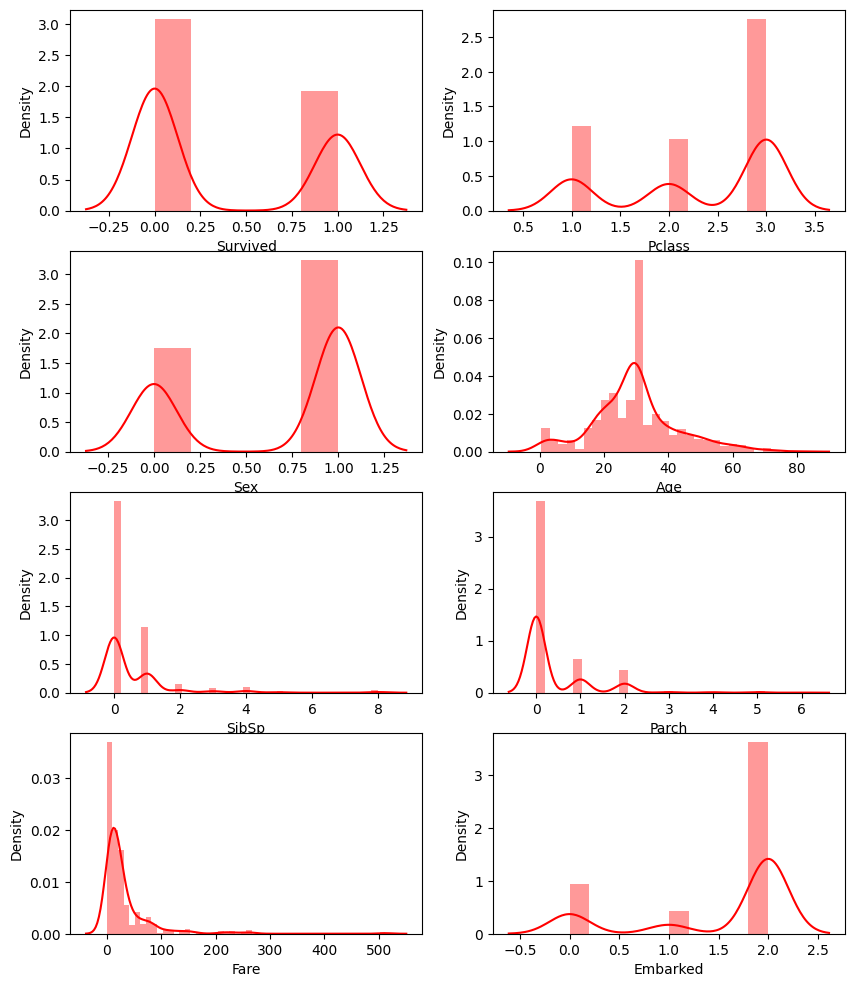

In [18]:
plt.figure(figsize = (10,12))
plotnumber = 1
for col in data.columns:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(data[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

In [19]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.257476
dtype: float64

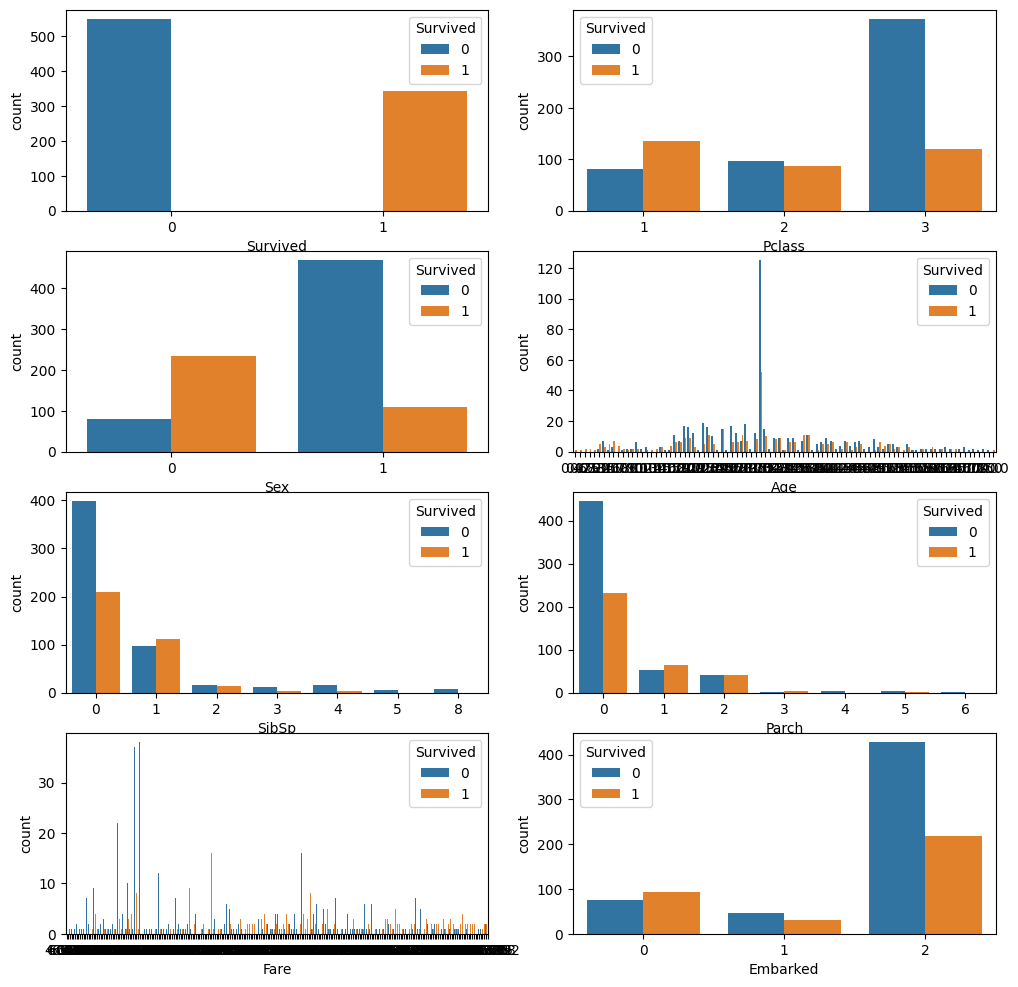

In [20]:
plt.figure(figsize = (12,12))
plotnumber = 1
for col in data.columns:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(x = data[col], hue=data['Survived'])
        plt.xlabel(col)
        plotnumber +=1

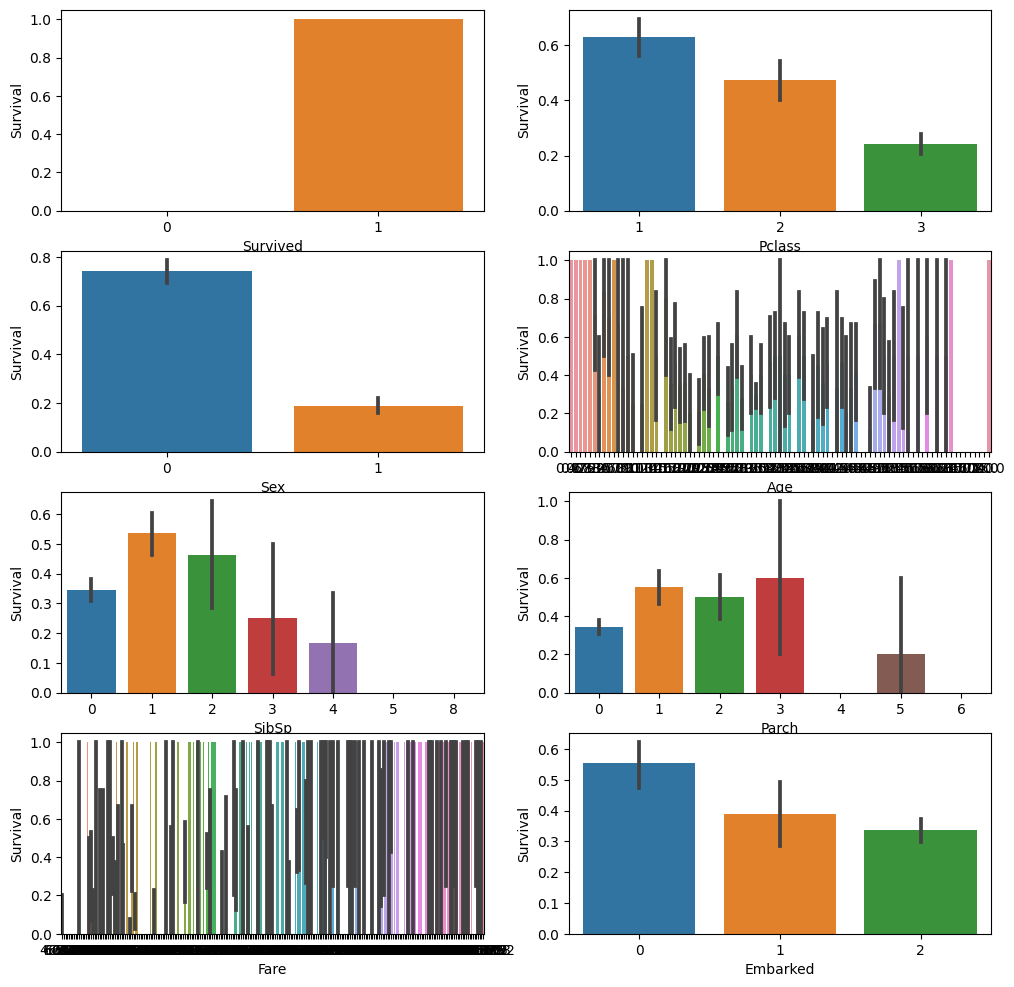

In [21]:
plt.figure(figsize = (12,12))
plotnumber = 1
for col in data.columns:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.barplot(x = data[col], y=data['Survived'])
        plt.xlabel(col)
        plt.ylabel('Survival')
        plotnumber +=1

Higher Chance of survival:
- People in 1st class
- Females
- younger people
- people with family


It might be a good idea to separate alone people from people with family so we only have two categories for those two columns

In [33]:
data["Family"] = data['SibSp'] + data['Parch']
data["Alone"] = np.where(data["Family"] > 0, 0,1)
data.drop('Family',axis=1,inplace=True)

In [36]:
data.drop(columns = ['SibSp','Parch'],axis=1,inplace=True)

In [37]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,1,22.0,7.2500,2,0
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,1


<Axes: >

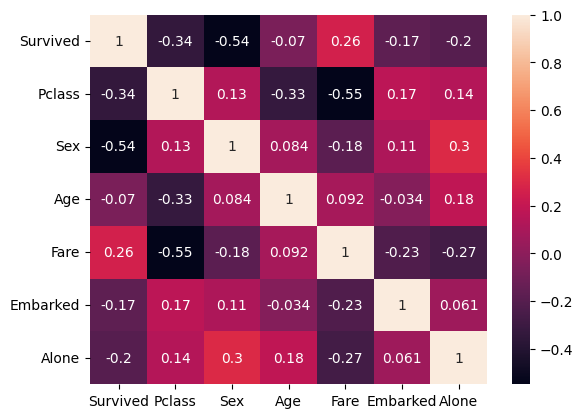

In [38]:
sns.heatmap(data.corr(), annot=True)

Most features have a reasonably good relationship with thw target.

There seems to be a bit of multicolinearity between Fare and Class which was expected. We will keep both for the time being.


As observed before the fare column has skewness with outliers towards the top.
Since this could be a representation of most similar scenarios where there will be a few super rich in the mix of people, we will not remove the outliers for now.

In [39]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [42]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

The number of the people who didn't survive is higher than survived ones but it's not a massive difference to call it imabalanced

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 0.8432835820895522 
 Best Random State: 70


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=MaxRS)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**Random Forest Classifier**

In [48]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

0.7985074626865671
[[139  17]
 [ 37  75]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       156
           1       0.82      0.67      0.74       112

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



**Logistic Regression**

In [49]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
print(accuracy_score(y_test,LRpred))
print(confusion_matrix(y_test,LRpred))
print(classification_report(y_test,LRpred))

0.8432835820895522
[[143  13]
 [ 29  83]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       156
           1       0.86      0.74      0.80       112

    accuracy                           0.84       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.85      0.84      0.84       268



**Support Vector**

In [50]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.8208955223880597
[[150   6]
 [ 42  70]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       156
           1       0.92      0.62      0.74       112

    accuracy                           0.82       268
   macro avg       0.85      0.79      0.80       268
weighted avg       0.84      0.82      0.81       268



**Gradient Boosting**

In [51]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

0.8208955223880597
[[145  11]
 [ 37  75]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       156
           1       0.87      0.67      0.76       112

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



**Bagging**

In [52]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
BCpred = BC.predict(x_test)
print(accuracy_score(y_test,BCpred))
print(confusion_matrix(y_test,BCpred))
print(classification_report(y_test,BCpred))

0.8022388059701493
[[140  16]
 [ 37  75]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       156
           1       0.82      0.67      0.74       112

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



**Cross Validation**




In [54]:
score = cross_val_score(RFC, x_scaled,y)
print(score)
print(score.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,RFCpred)-score.mean())

[0.79329609 0.80898876 0.84269663 0.76404494 0.80898876]
0.8036030381018142
Difference Between score mean and accuracy score: -0.005095575415247078


In [55]:
score1 = cross_val_score(LR, x_scaled,y)
print(score1)
print(score1.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,LRpred)-score1.mean())

[0.77653631 0.79213483 0.7752809  0.7752809  0.79775281]
0.7833971502102818
Difference Between score mean and accuracy score: 0.05988643187927045


In [56]:
score2 = cross_val_score(svc, x_scaled,y)
print(score2)
print(score2.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,svcpred)-score2.mean())

[0.80446927 0.80898876 0.81460674 0.79775281 0.84269663]
0.8137028435126483
Difference Between score mean and accuracy score: 0.007192678875411418


In [57]:
score3 = cross_val_score(GBC, x_scaled,y)
print(score3)
print(score3.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,GBCpred)-score3.mean())

[0.79888268 0.8258427  0.83707865 0.79775281 0.85393258]
0.8226978846274559
Difference Between score mean and accuracy score: -0.0018023622393961158


In [58]:
score4 = cross_val_score(BC, x_scaled,y)
print(score4)
print(score4.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,BCpred)-score4.mean())

[0.74860335 0.81460674 0.84269663 0.7752809  0.82022472]
0.8002824681438703
Difference Between score mean and accuracy score: 0.00195633782627902


Gradient Boosting Classifier seem to be the best model

**Tuning Parameters**

In [59]:
from sklearn.model_selection import GridSearchCV

In [68]:
param = {'loss': ['log_loss', 'exponential'] ,'criterion': ['friedman_mse', 'squared_error'], 'n_estimators':[50,100,200,300,500], 'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.2, 0.5]}
gscv = GridSearchCV(GBC,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.2, 0.5],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [50, 100, 200, 300, 500]})

In [69]:
gscv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.08,
 'loss': 'exponential',
 'n_estimators': 200}

In [70]:
model = GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.08,loss= 'exponential', n_estimators= 200)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8208955223880597
[[144  12]
 [ 36  76]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       156
           1       0.86      0.68      0.76       112

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



In [71]:
import joblib

In [72]:
joblib.dump(model,'titanic_model.pk1')

['titanic_model.pk1']

In [73]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred

In [74]:
df

,Actual,Prediction
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
263,0,0
264,0,0
265,0,0
266,0,0


In [75]:
from sklearn import metrics

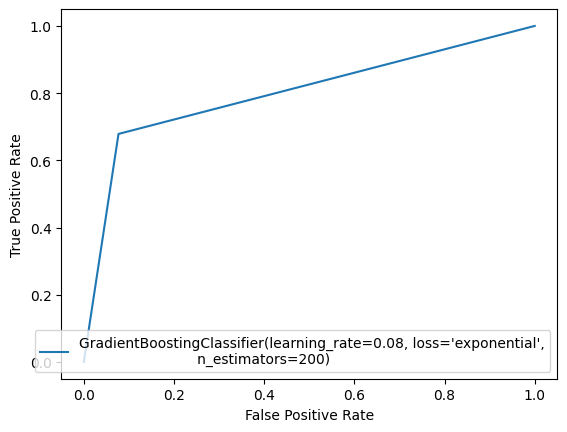

In [76]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = model)
rfcurve.plot()